In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [88]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


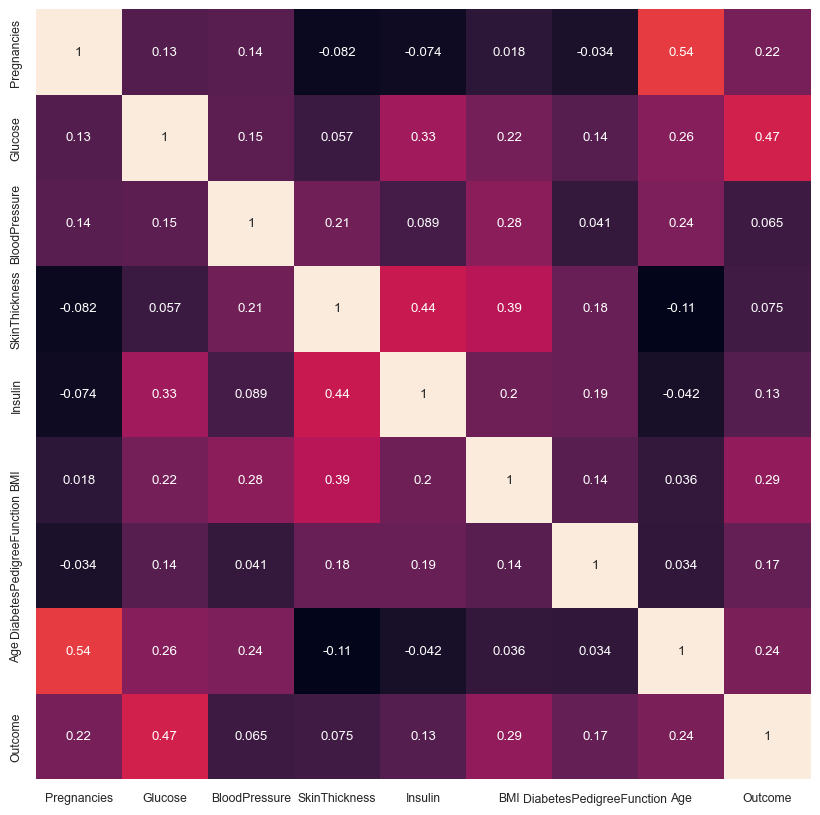

In [89]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [127]:
X = df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [129]:
X = X.drop('BMI',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [93]:
y = df[['BMI']]
print(y.columns)

Index(['BMI'], dtype='object')


In [94]:
#원핫인코딩
Y = pd.get_dummies(y).values

In [95]:
X = X.values

In [96]:
X

array([[  6.   , 148.   ,  72.   , ...,   0.   ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.   ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,   0.   ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ..., 112.   ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,   0.   ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.   ,   0.315,  23.   ]])

In [97]:
y

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
...,...
763,32.9
764,36.8
765,26.2
766,30.1


In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [99]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((614, 7), (614, 1), (154, 7), (154, 1))

In [100]:
# Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()

# 수정: input_shape를 (7,)로 변경 (실제 피처 수가 7개일 경우)
model.add(Dense(8, input_shape=(7,), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

model.summary()


C:\Users\leehy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,295 (5.06 KB)

 Trainable params: 1,295 (5.06 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
N_EPOCHS = 10

history = model.fit(
    x=X_train,
    y=y_train,
    epochs=N_EPOCHS,
    batch_size=32,
    validation_data=(X_test, y_test)
)

y_pred = model.predict(X_test)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 1037.2986 - mse: 1037.2986 - val_loss: 153.9933 - val_mse: 153.9933
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 131.6997 - mse: 131.6997 - val_loss: 80.5613 - val_mse: 80.5613
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 103.8172 - mse: 103.8172 - val_loss: 73.4811 - val_mse: 73.4811
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 81.7814 - mse: 81.7814 - val_loss: 74.4508 - val_mse: 74.4508
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 78.5889 - mse: 78.5889 - val_loss: 68.7334 - val_mse: 68.7334
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 73.7868 - mse: 73.7868 - val_loss: 75.7751 - val_mse: 75.7751
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 71.0270 - mse: 71.0270 - val_loss: 71.9008 - val_mse: 71.9008
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 70.5548 - mse: 70.5548 - val_loss: 64.5991 - val_mse: 64.5991
Epoch 9/10
20/20 ━━━━━

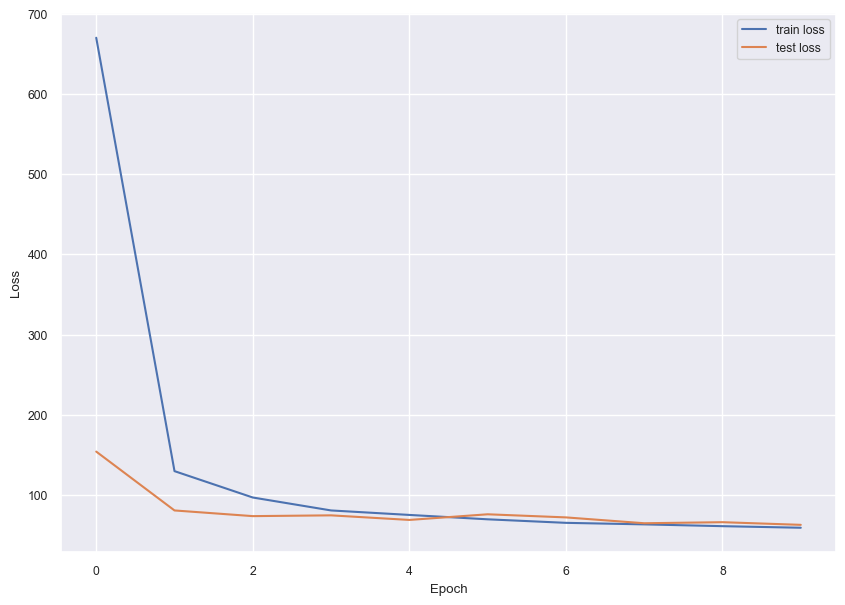

In [102]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [103]:
model.evaluate(X_test, y_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 63.3260 - mse: 63.3260


[62.60332489013672, 62.60332489013672]